In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/19_3, UAP.csv'
filename_clean = '../csv_detection_info_clean/19_3, UAP.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/19/3, UAP'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.4.192.168.1.90.2019.3.10.9.37.5...,1029,1190,784,946,0.999962,19,3,"3, UAP"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.519030153.53007.19101.36621.161...,414,602,1335,1524,0.999989,19,3,"3, UAP"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11581192825.62103.59972.47907.54606...,910,1075,439,604,1.000000,19,3,"3, UAP"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1268309609.39083.49219.40560.47745....,1978,2209,993,1224,0.961648,19,3,"3, UAP"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1733930170.3730.58691.35714.21729.1...,865,1096,1073,1304,0.987276,19,3,"3, UAP"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.2673690365.64358.36938.47126.8095.3...,2405,2614,2842,3051,0.998604,19,3,"3, UAP"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.2981736969.10300.47429.48483.63817....,1877,2099,2719,2941,0.980577,19,3,"3, UAP"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3392928835.19015.24640.48172.45829....,630,860,822,1054,0.990080,19,3,"3, UAP"
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.853224189.25027.14155.48118.17646.2...,779,986,1790,1997,0.998371,19,3,"3, UAP"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

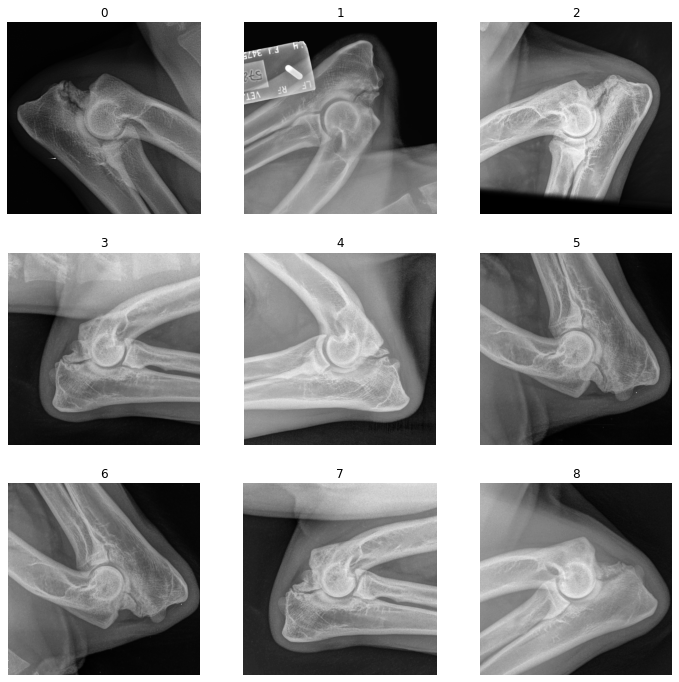

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
detection_df.to_csv(filename_clean, index=False)